Khalid Waleed Alhilal
2230000788
8m02

Task 1

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sample_image(image, factor):
    height, width = image.shape[:2]
    small = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, (width, height), interpolation=cv2.INTER_NEAREST)

def quantize_image(image, levels):
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    return quantized_image.astype(np.uint8)

def plot_results(original, sampled, quantized, s_factor, q_levels):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title(f'Sampled (Factor={s_factor})')
    
    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title(f'Quantized (Levels={q_levels})')
    
    plt.show()

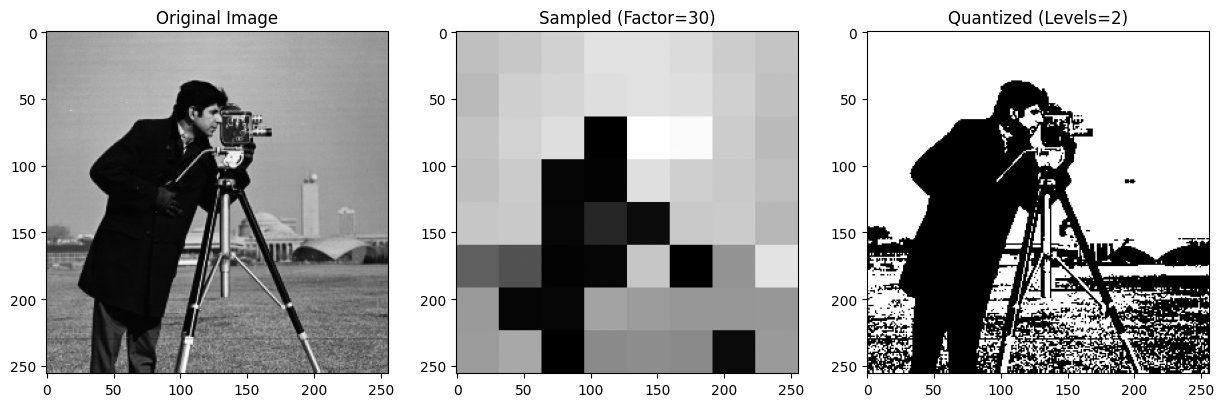

In [11]:
image_path = 'imagesLab2/new_image.jpg' 

sampling_factor = 30      # Try 10, 20, 50 (the more factor, the less the quality)
quantization_levels = 2   # Try 8, 4, 2 (the fewer the numbers, the lower the color quality).

# READ THE IMAGE
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: THERE IS NO IMAGE HERE")
else:
    sampled = sample_image(img, sampling_factor)
    quantized = quantize_image(img, quantization_levels)

    # VIEW THE RESULTS
    plot_results(img, sampled, quantized, sampling_factor, quantization_levels)

Task 2

In [12]:
# READ THE TWO IMAGES

img1 = cv2.imread('imagesLab2/cg.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('imagesLab2/co.jpg', cv2.IMREAD_GRAYSCALE)

# Make sure there are images
if img1 is None or img2 is None:
    print("no image here")
else:
    # Uniformity in size to ensure successful operations 
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    print("Images loaded and resized successfully.")


Images loaded and resized successfully.


Task2.1 Subtract two images 

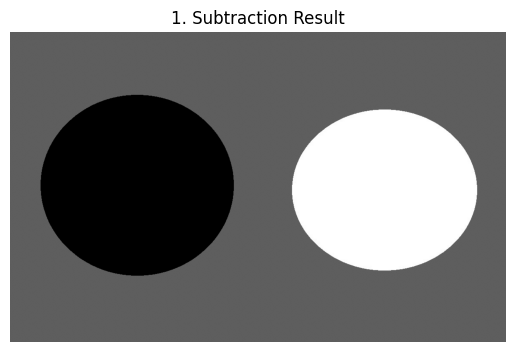

In [13]:
subtraction = cv2.subtract(img1, img2)

# View the result
plt.imshow(subtraction, cmap='gray')
plt.title('1. Subtraction Result')
plt.axis('off')
plt.show()

Task2.2 Add constant value of 175

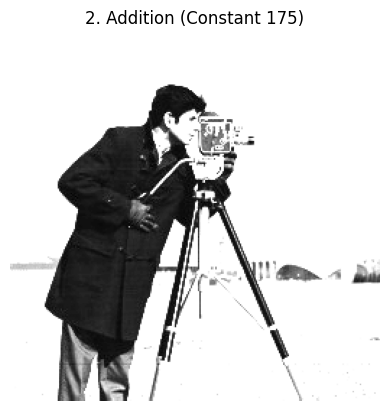

In [14]:
img3 = cv2.imread('imagesLab2/new_image.jpg', cv2.IMREAD_GRAYSCALE)
constant_matrix = np.full(img3.shape, 175, dtype=np.uint8)
addition_const = cv2.add(img3, constant_matrix)

# View the result
plt.imshow(addition_const, cmap='gray')
plt.title('2. Addition (Constant 175)')
plt.axis('off')
plt.show()

Task2.3 Set Difference (A - B)

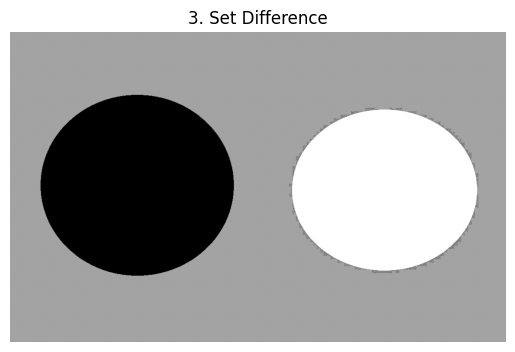

In [15]:
# Image1 AND (NOT Image2)
img2_not = cv2.bitwise_not(img2)
set_difference = cv2.bitwise_and(img1, img2_not)

# View the result
plt.imshow(set_difference, cmap='gray')
plt.title('3. Set Difference')
plt.axis('off')
plt.show()

Task2.4 Symmetric Difference (A XOR B)

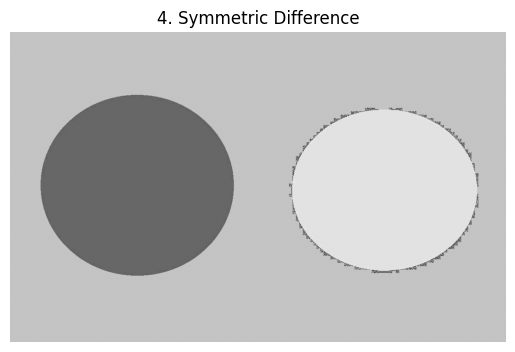

In [16]:
symmetric_diff = cv2.bitwise_xor(img1, img2)

# View the result
plt.imshow(symmetric_diff, cmap='gray')
plt.title('4. Symmetric Difference')
plt.axis('off')
plt.show()

Task2.5 Intersection (A AND B)

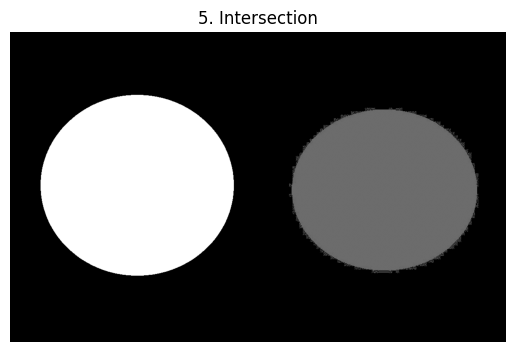

In [17]:
intersection = cv2.bitwise_and(img1, img2)

# View the result
plt.imshow(intersection, cmap='gray')
plt.title('5. Intersection')
plt.axis('off')
plt.show()